Authors: Walt, Andy, Elanore, and Nathan

In this project we will be examining a network based on buyer trust for Bit Coin. The trust factor is a Likert scale from -10 to +10 for most untrustworthy to most untrustworthy. Likert Scales are ordinal data, which is a sub-set of catagorical data where the catagory has an order, in this case from least to most trustworthy.

In [1]:
#Here we will import needed modules
import networkx as net
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from operator import itemgetter
from tabulate import tabulate

In [2]:
#Where I locally stored the data for usage
file = 'C:\\Users\\Nate\\Documents\\DataSet\\soc-sign-bitcoinotc.csv'
btc_otc_df = pd.read_csv(file, header=None, names=['user1', 'user2', 'weight', 'time'])
btc_otc_df = btc_otc_df.drop(columns = ['time'])#not needed for this analysis
btc_otc_df.head(6)

,user1,user2,weight
0,6,2,4
1,6,5,2
2,1,15,1
3,4,3,7
4,13,16,8
5,13,10,8


In [3]:
btc_otc_df.describe()

,user1,user2,weight
count,35592.000000,35592.000000,35592.000000
mean,2353.847269,2417.478254,1.012025
std,1605.771178,1658.232170,3.562094
min,1.000000,1.000000,-10.000000
25%,988.000000,978.000000,1.000000
50%,2125.000000,2178.000000,1.000000
75%,3722.000000,3804.000000,2.000000
max,6000.000000,6005.000000,10.000000


In [4]:
btc_otc_net = net.from_pandas_edgelist(btc_otc_df, source ='user1', target ='user2', edge_attr = 'weight')
btc_otc_net.number_of_edges()

21492

In [5]:
btc_otc_net.number_of_nodes()

5881

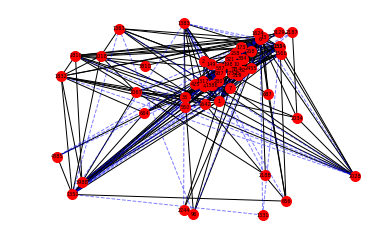

In [40]:
"""
To cut down on run-time, We are going to look at the network for user: 6 who is the first user listed in the table.
Drawing Edge Weights we used the template from: https://networkx.github.io/documentation/networkx-1.9/examples/drawing/weighted_graph.html
"""
user_6 = btc_otc_net.subgraph([6, 2,  5,  10,  4,  32,  7,  35,  114,  77,  173,  258,  268,  219,  198,  1,  664,  937,  384,  521,  280,  687,  1386,  537,  1317,  1566,  149,  2034,  2455,  1383,  425,  1810,  2028,  1363,  1018,  1832,  1624,  550,  1331,  2642,  856,  2188,  2187,  1752,3810,3129,2244,135,13, 2067,61318,4385,2524,3988,1352,96])
epos=[(u,v) for (u,v,d) in user_6.edges(data=True) if d['weight'] >=0]
eneg=[(u,v) for (u,v,d) in user_6.edges(data=True) if d['weight'] <0]
pos=net.spring_layout(user_6)
#plt.subplot(3,1,1)
net.draw_networkx_nodes(user_6,pos,node_size=100)

# edges
net.draw_networkx_edges(user_6,pos,edgelist=epos,
                    width=1)
net.draw_networkx_edges(user_6,pos,edgelist=eneg,
                    width=1,alpha=0.5,edge_color='b',style='dashed')

# labels
net.draw_networkx_labels(user_6,pos,font_size=5,font_family='sans-serif')

plt.axis('off')
plt.show()

In [7]:
print("Nodes in the user 6 Subgraph: " + str (user_6.number_of_nodes()))
print("Edges in the user 6 Subgraph: " + str (user_6.number_of_edges()))

Nodes in the user 6 Subgraph: 55
Edges in the user 6 Subgraph: 253


We see in the graph above, that for node 6 the negative (distrusted) nodes, as dashed lines, tend to form on the outside of the graph. This suggests that our hypothesis that untrusted nodes will have less centerality may have some merit.  

In [8]:
deg = net.degree(btc_otc_net)
print("The degree of node 6 is "+str(deg[6]))
type(deg)

The degree of node 6 is 55


networkx.classes.reportviews.DegreeView

In [9]:
print("The center of the user_6 network is "+str(net.center(user_6)) + "\n")
#print("The center of the Bit Coin network is "+str(net.center(btc_otc_net)) + "\n")
#Finding center of the entire network throws error because of an infinite path.
# This may be because there are several overlapping discontected networks present.

The center of the user_6 network is [6]



## Degree Centrality

Some of the code in the SNA text seems to be deprecaited, so Stackover flow has been invaluable in how to iterate over the degree() function, since it returns an iterator instead of a list. Specifically this page: https://stackoverflow.com/questions/3121979/how-to-sort-list-tuple-of-lists-tuples
which recommended using the itemgetter() operator. 

We can see in the code blocks below that the maximum degree is node 35 with degree 795. The minimum degree in the network is 1, meaning that there are no isolates. 

In [10]:
deg_list = list(deg)
print('The maximum degree in the network is: '+str(max(deg_list,key=itemgetter(1))[1]))
print('The minimum degree in the newowrk is: ' +str(min(deg_list,key=itemgetter(1))[1]))

The maximum degree in the network is: 795
The minimum degree in the newowrk is: 1


In [11]:
iso_list = net.isolates(btc_otc_net)
print('The number of isolates in the network are: '+ str(len(list(iso_list))))

The number of isolates in the network are: 0


### The following block of code gives us our top 10 list of degree centrality:

In [12]:
sorted_deg_list = sorted(deg_list, key=lambda tup: tup[1], reverse=True)
print(tabulate(sorted_deg_list[0:10], headers = ['UserID', 'Degree'],tablefmt='grid'))

+----------+----------+
|   UserID |   Degree |
+==========+==========+
|       35 |      795 |
+----------+----------+
|     1810 |      439 |
+----------+----------+
|     2642 |      438 |
+----------+----------+
|     2125 |      436 |
+----------+----------+
|     2028 |      326 |
+----------+----------+
|      905 |      320 |
+----------+----------+
|     4172 |      293 |
+----------+----------+
|        1 |      264 |
+----------+----------+
|        7 |      239 |
+----------+----------+
|     3129 |      217 |
+----------+----------+


The the following log-log Histogram, we see that approximately 2000 users have a degree of 1 or 2, and approximately 1000 users have a degree of 3 or 4. Since there are 5881 users, this means that less than half have a network of 5 or more users. In fact, large networks of 100 or more are relatively rare, accounting for 46 users.

As pointed out in the SNA text, we will see many of these 'celebrities' appear in the lists for other centrality measures.

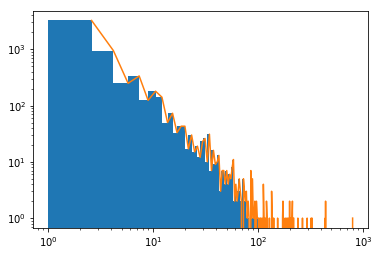

In [41]:
#First we extract the degrees from the sorted list
plt.close()
degrees_only = [n[1] for n in sorted_deg_list]
h = plt.hist(degrees_only, 500)
#plt.subplot(3,1,2)
plt.loglog(h[1][1:],h[0])#This slicing of the histogram comes from the SNA text.
plt.show()

In [14]:
print('The 46th top user by degree centrality has a degree of: ' + str(sorted_deg_list[45][1])) #recall 0 indexing

The 46th top user by degree centrality has a degree of: 100


In [15]:
close = net.closeness_centrality(btc_otc_net)

In [16]:
sorted_close = sorted(close.items(), key=itemgetter(1), reverse=True)
print(tabulate(sorted_close[0:10], headers = ['UserID', 'Closeness'],tablefmt='grid'))

+----------+-------------+
|   UserID |   Closeness |
+==========+=============+
|      905 |    0.436024 |
+----------+-------------+
|        1 |    0.433031 |
+----------+-------------+
|       35 |    0.427479 |
+----------+-------------+
|     2388 |    0.418964 |
+----------+-------------+
|     1810 |    0.410954 |
+----------+-------------+
|     2642 |    0.410465 |
+----------+-------------+
|       13 |    0.410092 |
+----------+-------------+
|     2296 |    0.407642 |
+----------+-------------+
|     2028 |    0.407302 |
+----------+-------------+
|     2125 |    0.406963 |
+----------+-------------+


In the catagories below, we will see that users 905 and 2125 will be of particular interest especailly when it comes to the negative weight sub-network. Here we see that both score high in centrality for the entire network.

In [17]:
btwn = net.betweenness_centrality(btc_otc_net)

In [18]:
sorted_btwn = sorted(btwn.items(), key=itemgetter(1), reverse=True)
print(tabulate(sorted_btwn[0:10], headers = ['UserID', 'Betweenness'],tablefmt='grid'))

+----------+---------------+
|   UserID |   Betweenness |
+==========+===============+
|       35 |     0.193143  |
+----------+---------------+
|     2125 |     0.0777387 |
+----------+---------------+
|     2642 |     0.0647239 |
+----------+---------------+
|     1810 |     0.061622  |
+----------+---------------+
|        1 |     0.0528104 |
+----------+---------------+
|      905 |     0.0525848 |
+----------+---------------+
|     3129 |     0.0519641 |
+----------+---------------+
|     4172 |     0.0496612 |
+----------+---------------+
|     2028 |     0.0444701 |
+----------+---------------+
|        7 |     0.039281  |
+----------+---------------+


In [19]:
eigen = net.eigenvector_centrality(btc_otc_net)

In [20]:
sorted_eigen = sorted(eigen.items(), key=itemgetter(1), reverse=True)
print(tabulate(sorted_eigen[0:10], headers = ['UserID', 'Eigen Vector'],tablefmt='grid'))

+----------+----------------+
|   UserID |   Eigen Vector |
+==========+================+
|      905 |       0.188653 |
+----------+----------------+
|     1810 |       0.182641 |
+----------+----------------+
|     2642 |       0.175077 |
+----------+----------------+
|     2028 |       0.154839 |
+----------+----------------+
|     2125 |       0.148704 |
+----------+----------------+
|       35 |       0.146066 |
+----------+----------------+
|        1 |       0.14085  |
+----------+----------------+
|     1334 |       0.135365 |
+----------+----------------+
|     4172 |       0.135335 |
+----------+----------------+
|     2388 |       0.133787 |
+----------+----------------+


Users like 7 or 2388, who has a higher degree centrality but lower eigenvector have large networks, but the people that they are connected to are not connected to too many other people. In terms of a cryto-currency exchange these users might be the interface point for an overseas trading group. 

Conversely, users like 1334 or 3129 with higher eigen vector centrality but lower degree centrality have smaller well contected networks. These maybe the 'grey cardinals' that are discussed in SNA. These users may be hedge funds that have invested in crypto-currency but only go through well connected users to do so.

## Sub-networks by Trust

Now that we know the celeberities in the whole network, we can now look at how the trust score, -10 to most untrustworthy to +10 for most trustworthy. At first pass, We want to see what the trustworhty network looks like as a whole.  We will divide the data into three networks: Positive with weights > 0, Neutral with weights = 0, and Negative, with weight < 0.

### Positive Sub-network. 

The original dataframe gives a simple way of filtering out values less than or equal to zero. This will be the basis for the positive trust sub-network.

In [22]:
btc_pos = btc_otc_df.loc[btc_otc_df['weight'] > 0]
print(btc_pos.head())

   user1  user2  weight
0      6      2       4
1      6      5       2
2      1     15       1
3      4      3       7
4     13     16       8


In [23]:
btc_pos_net = net.from_pandas_edgelist(btc_pos, source ='user1', target ='user2', edge_attr = 'weight')
print("Number of Edges in the positive network: "+str(btc_pos_net.number_of_edges()))

Number of Edges in the positive network: 18591


In [24]:
print("Number of Node in the positive network: "+str(btc_pos_net.number_of_nodes()))

Number of Node in the positive network: 5573


In [25]:
pos_deg = net.degree(btc_pos_net)
pos_deg_list = list(pos_deg)
print('The maximum degree in the network is: '+str(max(pos_deg_list,key=itemgetter(1))[1]))
print('The minimum degree in the newowrk is: ' +str(min(pos_deg_list,key=itemgetter(1))[1]))
sorted_pos_deg_list = sorted(pos_deg_list, key=lambda tup: tup[1], reverse=True)
print(tabulate(sorted_pos_deg_list[0:10], headers = ['UserID', 'Degree'],tablefmt='grid'))
pos_eigen = net.eigenvector_centrality(btc_pos_net)
sorted_pos_eigen = sorted(pos_eigen.items(), key=itemgetter(1), reverse=True)
print(tabulate(sorted_pos_eigen[0:10], headers = ['UserID', 'Eigen Vector'],tablefmt='grid'))

The maximum degree in the network is: 788
The minimum degree in the newowrk is: 1
+----------+----------+
|   UserID |   Degree |
+==========+==========+
|       35 |      788 |
+----------+----------+
|     2642 |      433 |
+----------+----------+
|     1810 |      296 |
+----------+----------+
|     2028 |      291 |
+----------+----------+
|      905 |      270 |
+----------+----------+
|        1 |      259 |
+----------+----------+
|        7 |      236 |
+----------+----------+
|     4172 |      220 |
+----------+----------+
|     3129 |      216 |
+----------+----------+
|     2125 |      213 |
+----------+----------+
+----------+----------------+
|   UserID |   Eigen Vector |
+==========+================+
|     2642 |       0.193922 |
+----------+----------------+
|      905 |       0.186048 |
+----------+----------------+
|       35 |       0.171816 |
+----------+----------------+
|     1810 |       0.156171 |
+----------+----------------+
|        1 |       0.152799 |
+-----

This is nearly the entire network. Which is good in that it means that there is a high number of nodes where there is trust, however it isn't that interesting in that it doesn't add to anything we that we already know.

To that end, we will break down the networks into high trust, low trust, neutral, and mistrust.

### Highly Positive Network 

The description of the distrubtion of the weighting factor above tells us that the trust factor has a mode at +1, since the 1 quartile and median are both 1 and the 3rd quartile is only 2. This also tells us that the high trust sub network is going to be much smaller than the low trust sub-network. We will put the cut-off at 5 to capture more nodes in the high trust sub-network.

In [26]:
btc_high_pos = btc_otc_df.loc[btc_otc_df['weight'] >= 5]
btc_high_pos_net = net.from_pandas_edgelist(btc_high_pos, source ='user1', target ='user2', edge_attr = 'weight')
print("Number of Edges in the positive network: "+str(btc_high_pos_net.number_of_edges()))
print("Number of Node in the positive network: "+str(btc_high_pos_net.number_of_nodes()))

Number of Edges in the positive network: 2218
Number of Node in the positive network: 1588


In [27]:
hi_deg = net.degree(btc_high_pos_net)
hi_deg_list = list(hi_deg)
print('The maximum degree in the network is: '+str(max(hi_deg_list,key=itemgetter(1))[1]))
print('The minimum degree in the newowrk is: ' +str(min(hi_deg_list,key=itemgetter(1))[1]))
sorted_hi_deg_list = sorted(hi_deg_list, key=lambda tup: tup[1], reverse=True)
print(tabulate(sorted_hi_deg_list[0:10], headers = ['UserID', 'Degree'],tablefmt='grid'))
hi_eigen = net.eigenvector_centrality(btc_high_pos_net)
sorted_hi_eigen = sorted(hi_eigen.items(), key=itemgetter(1), reverse=True)
print(tabulate(sorted_hi_eigen[0:10], headers = ['UserID', 'Eigen Vector'],tablefmt='grid'))

The maximum degree in the network is: 77
The minimum degree in the newowrk is: 1
+----------+----------+
|   UserID |   Degree |
+==========+==========+
|        1 |       77 |
+----------+----------+
|     2642 |       71 |
+----------+----------+
|       35 |       57 |
+----------+----------+
|        7 |       50 |
+----------+----------+
|     2028 |       49 |
+----------+----------+
|      257 |       48 |
+----------+----------+
|     4172 |       48 |
+----------+----------+
|       25 |       43 |
+----------+----------+
|     1018 |       37 |
+----------+----------+
|     1810 |       35 |
+----------+----------+
+----------+----------------+
|   UserID |   Eigen Vector |
+==========+================+
|        1 |       0.388374 |
+----------+----------------+
|        7 |       0.233202 |
+----------+----------------+
|     1386 |       0.227948 |
+----------+----------------+
|     1201 |       0.199311 |
+----------+----------------+
|     1383 |       0.198189 |
+------

We see new people show up on the list for degree centrality: users 25, 257 and 1018. This implies these users opperate in fairly isolated sub-networks, as eigen vector centrality is a measure of how the nodes in network link to other nodes. Prehaps these users only deal with people they know personally.

We see the opposite with users 1386, 1201, 1383, 1317, 1396, and 1565. The have fairly small networks with respect to nodes, but fairly high eigen vector centrality. This means that they only deal with a few highly connected, highly regarded users. These users are being very cautious with there investments.

Note that users 905 and 2125 do not appear on this list.

### Low Positive Network

In [28]:
btc_low_pos = btc_otc_df.loc[(btc_otc_df['weight'] > 0) & (btc_otc_df['weight'] < 5)]
btc_low_pos_net = net.from_pandas_edgelist(btc_low_pos, source ='user1', target ='user2', edge_attr = 'weight')
print("Number of Edges in the positive network: "+str(btc_low_pos_net.number_of_edges()))
print("Number of Node in the positive network: "+str(btc_low_pos_net.number_of_nodes()))

Number of Edges in the positive network: 17223
Number of Node in the positive network: 5399


In [34]:
lo_deg = net.degree(btc_low_pos_net)
lo_deg_list = list(lo_deg)
print('The maximum degree in the network is: '+str(max(lo_deg_list,key=itemgetter(1))[1]))
print('The minimum degree in the newowrk is: ' +str(min(lo_deg_list,key=itemgetter(1))[1]))
sorted_lo_deg_list = sorted(lo_deg_list, key=lambda tup: tup[1], reverse=True)
print(tabulate(sorted_lo_deg_list[0:10], headers = ['UserID', 'Degree'],tablefmt='grid'))
lo_eigen = net.eigenvector_centrality(btc_low_pos_net)
sorted_lo_eigen = sorted(lo_eigen.items(), key=itemgetter(1), reverse=True)
print(tabulate(sorted_lo_eigen[0:10], headers = ['UserID', 'Eigen Vector'],tablefmt='grid'))

The maximum degree in the network is: 773
The minimum degree in the newowrk is: 1
+----------+----------+
|   UserID |   Degree |
+==========+==========+
|       35 |      773 |
+----------+----------+
|     2642 |      400 |
+----------+----------+
|     1810 |      277 |
+----------+----------+
|     2028 |      258 |
+----------+----------+
|      905 |      253 |
+----------+----------+
|        7 |      216 |
+----------+----------+
|     3129 |      215 |
+----------+----------+
|        1 |      208 |
+----------+----------+
|     4197 |      208 |
+----------+----------+
|     2125 |      205 |
+----------+----------+
+----------+----------------+
|   UserID |   Eigen Vector |
+==========+================+
|       35 |       0.203776 |
+----------+----------------+
|     2642 |       0.184791 |
+----------+----------------+
|      905 |       0.179288 |
+----------+----------------+
|     1810 |       0.155505 |
+----------+----------------+
|     3988 |       0.13352  |
+-----

The low trust network comprises 73% of the nodes in the entire network, so it is no surprise that the top 10 degree centrality list is the same users as the entire network 10 ten, albeit in different order.

Notice that the top 10 for eigen vector centrality has new users: 3988, 4197 so these grey cardinals are somehow less discrimating in there network connections. 

### Neutral Sub-network

In [35]:
btc_ntr = btc_otc_df.loc[btc_otc_df['weight'] == 0]
print(btc_ntr.head())

Empty DataFrame
Columns: [user1, user2, weight]
Index: []


This is just to show that there are no neutral participants. The users were forced to have an opinion one way or another. 

### Negative Sub-network

Now we will examine the edges that have been weighted with negative values. That is users who do not trust each other.

In [36]:
btc_neg = btc_otc_df.loc[btc_otc_df['weight'] < 0]
print(btc_neg.head())

     user1  user2  weight
596    104    179      -1
597    200    179      -1
598    149    179      -1
632      7    179      -1
646    135    179      -1


In [37]:
btc_neg_net = net.from_pandas_edgelist(btc_neg, source ='user1', target ='user2', edge_attr = 'weight')
print("Number of Edges in the positive network: "+str(btc_neg_net.number_of_edges()))
print("Number of Node in the positive network: "+str(btc_neg_net.number_of_nodes()))

Number of Edges in the positive network: 3259
Number of Node in the positive network: 1606


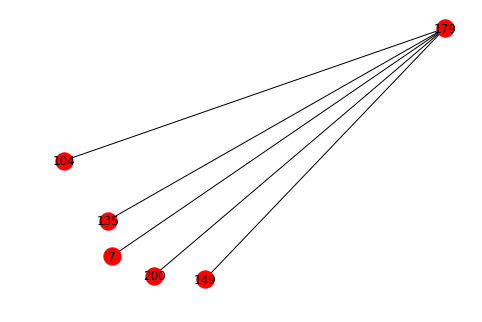

In [44]:
#179 showed up a lot in the head() call, so we will examine user 179's ego graph.
user179 = net.ego_graph(btc_neg_net,179)
net.draw(user179,with_labels = True)
plt.show()

In [38]:
neg_deg = net.degree(btc_neg_net)
neg_deg_list = list(neg_deg)
print('The maximum degree in the network is: '+str(max(neg_deg_list,key=itemgetter(1))[1]))
print('The minimum degree in the newowrk is: ' +str(min(neg_deg_list,key=itemgetter(1))[1]))
sorted_neg_deg_list = sorted(neg_deg_list, key=lambda tup: tup[1], reverse=True)
print(tabulate(sorted_neg_deg_list[0:10], headers = ['UserID', 'Degree'],tablefmt='grid'))
neg_eigen = net.eigenvector_centrality(btc_neg_net)
sorted_neg_eigen = sorted(neg_eigen.items(), key=itemgetter(1), reverse=True)
print(tabulate(sorted_neg_eigen[0:10], headers = ['UserID', 'Eigen Vector'],tablefmt='grid'))

The maximum degree in the network is: 227
The minimum degree in the newowrk is: 1
+----------+----------+
|   UserID |   Degree |
+==========+==========+
|     2125 |      227 |
+----------+----------+
|     1810 |      167 |
+----------+----------+
|     2266 |       98 |
+----------+----------+
|     4172 |       82 |
+----------+----------+
|     2067 |       80 |
+----------+----------+
|     3744 |       80 |
+----------+----------+
|      905 |       75 |
+----------+----------+
|     2877 |       65 |
+----------+----------+
|     2028 |       64 |
+----------+----------+
|     2045 |       60 |
+----------+----------+
+----------+----------------+
|   UserID |   Eigen Vector |
+==========+================+
|     1810 |       0.251258 |
+----------+----------------+
|     2125 |       0.2112   |
+----------+----------------+
|     3789 |       0.160404 |
+----------+----------------+
|     3790 |       0.160404 |
+----------+----------------+
|     3792 |       0.160404 |
+-----

We see some very interesting behavior in the negative network. As stated earlier, users 905 and 2125 are in both the top degree centrality and eigen vector centrality lists. So they are connected to a lot of people they don't trust and those people are also connected to a lot of people that don't trust each other. These two users also feature heavily in the low trust catagory. In this case they might be high volume traders that don't descriminate on who they trade with.

That said, in the eigen vector centrality list we have serialized accounts: 3789 to 3795. Futhermore, users 3789 to 3792 have the same score to 6 significant figures: 0.160404, and users 3793 to 3795 also have the same score to 6 significant digits: 0.155724. What are the odds?

Futher examination of their ego networks show that they all connect to users 2067 and/or 2017. It seems as if user(s) 2067/17 are scripting bots to make transactions. 

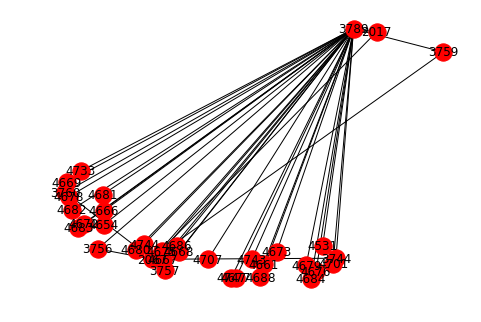

In [54]:
user3789 = net.ego_graph(btc_neg_net,3789)
net.draw(user3789,with_labels = True)
plt.show()

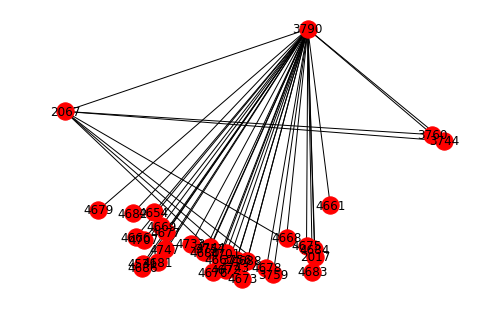

In [46]:
user3790 = net.ego_graph(btc_neg_net,3790)
net.draw(user3790,with_labels = True)
plt.show()

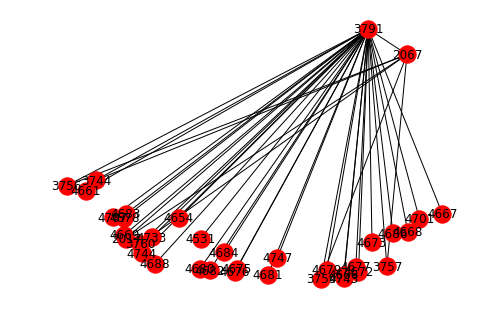

In [47]:
user3791 = net.ego_graph(btc_neg_net,3791)
net.draw(user3791,with_labels = True)
plt.show()

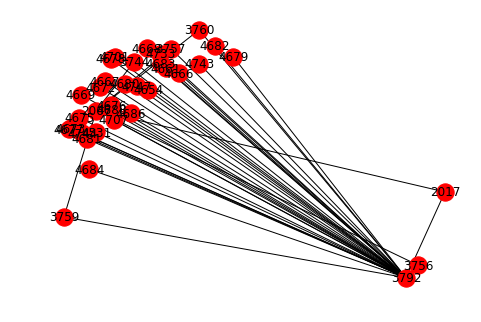

In [48]:
user3792 = net.ego_graph(btc_neg_net,3792)
net.draw(user3792,with_labels = True)
plt.show()

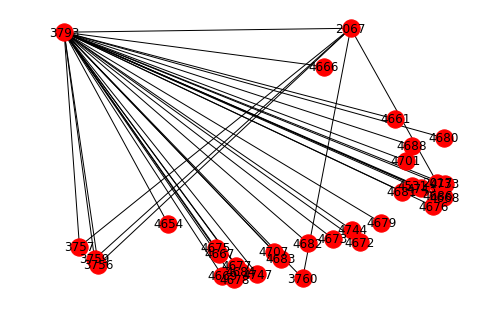

In [49]:
user3793 = net.ego_graph(btc_neg_net,3793)
net.draw(user3793,with_labels = True)
plt.show()

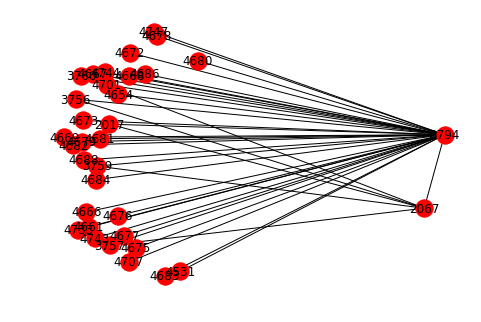

In [50]:
user3794 = net.ego_graph(btc_neg_net,3794)
net.draw(user3794,with_labels = True)
plt.show()

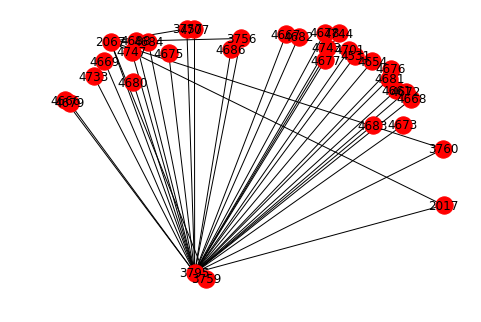

In [51]:
user3795 = net.ego_graph(btc_neg_net,3795)
net.draw(user3795,with_labels = True)
plt.show()

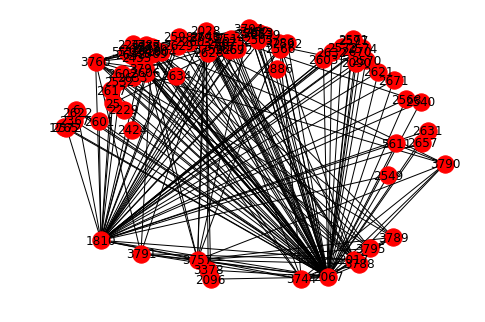

In [52]:
user2067 = net.ego_graph(btc_neg_net,2067)
net.draw(user2067,with_labels = True)
plt.show()

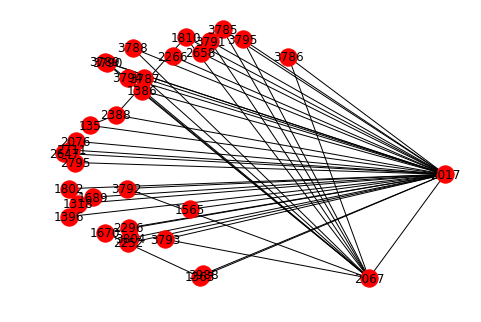

In [53]:
user2017 = net.ego_graph(btc_neg_net,2017)
net.draw(user2017,with_labels = True)
plt.show()

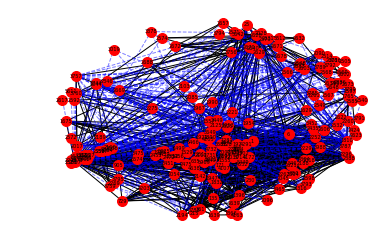

In [56]:
#Lets use the more detailed graph for user 2067 and 2017:
user2067 = net.ego_graph(btc_otc_net,2067)
epos=[(u,v) for (u,v,d) in user2067.edges(data=True) if d['weight'] >=0]
eneg=[(u,v) for (u,v,d) in user2067.edges(data=True) if d['weight'] <0]
pos=net.spring_layout(user2067)
#plt.subplot(3,1,1)
net.draw_networkx_nodes(user2067,pos,node_size=100)

# edges
net.draw_networkx_edges(user2067,pos,edgelist=epos,
                    width=1)
net.draw_networkx_edges(user2067,pos,edgelist=eneg,
                    width=1,alpha=0.5,edge_color='b',style='dashed')

# labels
net.draw_networkx_labels(user2067,pos,font_size=5,font_family='sans-serif')

plt.axis('off')
plt.show()

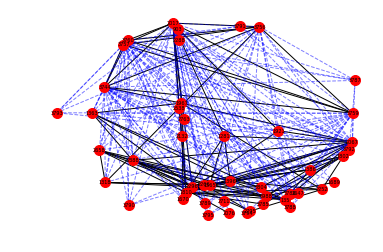

In [57]:
user2017 = net.ego_graph(btc_otc_net,2017)
epos=[(u,v) for (u,v,d) in user2017.edges(data=True) if d['weight'] >=0]
eneg=[(u,v) for (u,v,d) in user2017.edges(data=True) if d['weight'] <0]
pos=net.spring_layout(user2017)
#plt.subplot(3,1,1)
net.draw_networkx_nodes(user2017,pos,node_size=100)

# edges
net.draw_networkx_edges(user2017,pos,edgelist=epos,
                    width=1)
net.draw_networkx_edges(user2017,pos,edgelist=eneg,
                    width=1,alpha=0.5,edge_color='b',style='dashed')

# labels
net.draw_networkx_labels(user2017,pos,font_size=5,font_family='sans-serif')

plt.axis('off')
plt.show()

<IPython.core.display.Javascript object>


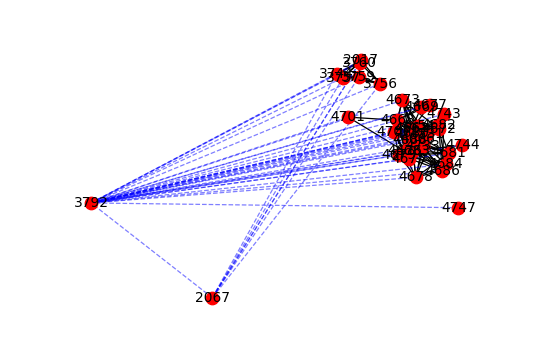

In [61]:
#here is a ceralized account with all nodes.
%matplotlib notebook
import matplotlib.pyplot as plt
user3792 = net.ego_graph(btc_otc_net,3792)
epos=[(u,v) for (u,v,d) in user3792.edges(data=True) if d['weight'] >=0]
eneg=[(u,v) for (u,v,d) in user3792.edges(data=True) if d['weight'] <0]
pos=net.spring_layout(user3792)
#plt.subplot(3,1,1)
net.draw_networkx_nodes(user3792,pos,node_size=100)

# edges
net.draw_networkx_edges(user3792,pos,edgelist=epos,
                    width=1)
net.draw_networkx_edges(user3792,pos,edgelist=eneg,
                    width=1,alpha=0.5,edge_color='b',style='dashed')

# labels
net.draw_networkx_labels(user3792,pos,font_size=11,font_family='sans-serif')

plt.axis('off')
plt.show()

In [65]:
print("Edges in 3792's network: " + str(sorted(user3792.edges())))

Edges in 3792's network: [(2067, 2017), (2067, 3744), (2067, 3756), (2067, 3757), (2067, 3759), (2067, 3760), (2067, 3792), (3744, 2017), (3744, 3756), (3744, 3757), (3744, 3759), (3744, 3760), (3744, 3792), (3756, 2017), (3756, 3757), (3756, 3759), (3756, 3760), (3756, 3792), (3757, 2017), (3757, 3759), (3757, 3760), (3757, 3792), (3759, 2017), (3759, 3760), (3759, 3792), (3760, 2017), (3760, 3792), (3792, 2017), (3792, 4688), (3792, 4701), (3792, 4707), (3792, 4733), (4531, 3792), (4531, 4661), (4531, 4666), (4531, 4667), (4531, 4673), (4531, 4675), (4531, 4678), (4531, 4683), (4531, 4707), (4531, 4733), (4654, 3792), (4654, 4531), (4654, 4661), (4654, 4666), (4654, 4667), (4654, 4668), (4654, 4673), (4654, 4675), (4654, 4676), (4654, 4683), (4654, 4707), (4654, 4733), (4661, 3792), (4661, 4666), (4661, 4667), (4661, 4673), (4661, 4675), (4661, 4683), (4661, 4707), (4661, 4733), (4666, 3792), (4666, 4667), (4666, 4673), (4666, 4675), (4666, 4683), (4666, 4707), (4666, 4733), (4667, 3

In more careful examination of user 3792, we see that all interactions with this user are negative. This user seems to be attacking two other networks. The smaller network is composed of nodes 2017, 3744, 3756, 3757, 3759, and 3760. The larger network is composed of nodes 4531, 4654, 4661, 4666, 4667, 4668, 4669 4672, 4673, 4675, 4676, 4677, 4679, 4680, 4681, 4682, 4684, 4686, 4688 4743, 4744, and 4747. Note that both networks are nearly serialized, too.

Something is definately going on that bares more careful investigation. A possible scenerio is that user(s) 2067/17 are creating bots to act as intemediaries for some shady transactions. They flag their bots as untrustowrthy so they blend in more with thier victims.